# Initialization

In [1]:
%load_ext autoreload
%autoreload 2

from jlib.transformer_char_predictor import TransformerCharPredictor, History
import jlib.data_utils as data_utils
import torch
import torch.nn as nn
import numpy as np
from torchprofile import profile_macs
text = ""
with open('data/sequence.txt', 'r') as f:
    text = f.read()


/home/jaskin/Intro_Deep_Learning/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
seqlen = 10
def train_and_plot(seqlen: int):
    data = data_utils.gen_datasets(text, seqlen)
    train_data = data['train_dataset']
    val_data = data['val_dataset']
    alphabet: data_utils.Alphabet = data['alphabet']

    train_fetcher = data_utils.gen_data_loader(
        train_data,
        batch_size=32,
        workers = 6,
        cpu_prefetch= 20,
        gpu_prefetch=20
    )

    val_fetcher = data_utils.gen_data_loader(
        val_data,
        batch_size=len(val_data),
        workers = 6,
        cpu_prefetch= 10,
        gpu_prefetch=10
    )

    # model

    model = TransformerCharPredictor(
        alphabet_size = len(alphabet),
        max_len = seqlen,
        hidden_dim = 2048,
        inner_dim = 2048,
        num_attn_heads = 2,
        num_attn_layers=3,
        cls_head_dims=[256],
        dropout = 0.3
    )

    
# Model parameter count: 1,790,380
# Model MACs: 568,279,052



    hist = model.train_model(
        epochs=200,
        train_fetcher=train_fetcher,
        val_fetcher=val_fetcher,
        optimizer = torch.optim.Adam,
        optimizer_kwargs={
            'lr': 3e-5,
            'betas': (0.9, 0.98),
            'eps': 1e-9,
            'weight_decay': 1e-5
        },
        min_accuracy=1,
        max_negative_diff_count=20,
        stop_on_plateau=True,
        print_epoch=1,
        header_epoch = 15,
    )

    fig = hist.plot_training(f'Small Corpus, Sequence Length {seqlen}')
    fig.savefig(f'latex/images/p1-{seqlen}.png')
    hist.save(f'models/history/p1-{seqlen}.json')
    hist_load = History.from_json(f'models/history/p1-{seqlen}.json')
    
    del train_fetcher, val_fetcher, train_data, val_data, data, model, alphabet
    





# Training

Begin init data loader
Batch Size: 0.00244140625 MiB
Data Loader init time: 1.217332 s
Begin init fetcher
Fetcher init time: 1.273874 s
Begin init data loader
Batch Size: 0.00335693359375 MiB
Data Loader init time: 0.216503 s
Begin init fetcher
Fetcher init time: 0.266904 s
Training TransformerCharPredictor

----------------------------------------------------------------------------------------------------------------------------------------------------
Begin Training


/home/jaskin/Intro_Deep_Learning/env/lib/python3.11/site-packages/torchprofile/profile.py:22: UserWarning: No handlers found: "aten::unflatten". Skipped.
  warnings.warn('No handlers found: "{}". Skipped.'.format(
/home/jaskin/Intro_Deep_Learning/env/lib/python3.11/site-packages/torchprofile/profile.py:22: UserWarning: No handlers found: "aten::unsqueeze". Skipped.
  warnings.warn('No handlers found: "{}". Skipped.'.format(
/home/jaskin/Intro_Deep_Learning/env/lib/python3.11/site-packages/torchprofile/profile.py:22: UserWarning: No handlers found: "aten::scaled_dot_product_attention". Skipped.
  warnings.warn('No handlers found: "{}". Skipped.'.format(
/home/jaskin/Intro_Deep_Learning/env/lib/python3.11/site-packages/torchprofile/profile.py:22: UserWarning: No handlers found: "aten::permute". Skipped.
  warnings.warn('No handlers found: "{}". Skipped.'.format(


|       Epoch        |   Epoch Time (s)   |   Training Loss    |  Validation Loss   |Validation Accuracy |   Δ Accuracy (%)   |    Memory Usage    |
----------------------------------------------------------------------------------------------------------------------------------------------------
|         0          |      0.894668      |      3.610809      |      3.308168      |     16.363636      |         inf        |      2.737131      |
----------------------------------------------------------------------------------------------------------------------------------------------------
|         1          |      0.436009      |      3.389555      |      3.148222      |     22.727273      |     38.888901      |      2.741037      |
----------------------------------------------------------------------------------------------------------------------------------------------------
|         2          |      0.461546      |      3.274420      |      3.006758      |     28.636363      |

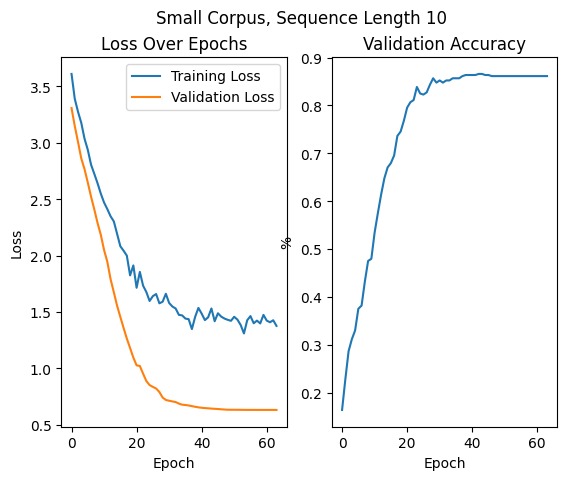

In [3]:
train_and_plot(10)


Begin init data loader
Batch Size: 0.0048828125 MiB
Data Loader init time: 0.116235 s
Begin init fetcher
Fetcher init time: 0.206859 s
Begin init data loader
Batch Size: 0.003509521484375 MiB
Data Loader init time: 0.208009 s
Begin init fetcher
Fetcher init time: 0.293665 s
Training TransformerCharPredictor

----------------------------------------------------------------------------------------------------------------------------------------------------
Begin Training


/home/jaskin/Intro_Deep_Learning/env/lib/python3.11/site-packages/torchprofile/profile.py:22: UserWarning: No handlers found: "aten::unflatten". Skipped.
  warnings.warn('No handlers found: "{}". Skipped.'.format(
/home/jaskin/Intro_Deep_Learning/env/lib/python3.11/site-packages/torchprofile/profile.py:22: UserWarning: No handlers found: "aten::unsqueeze". Skipped.
  warnings.warn('No handlers found: "{}". Skipped.'.format(
/home/jaskin/Intro_Deep_Learning/env/lib/python3.11/site-packages/torchprofile/profile.py:22: UserWarning: No handlers found: "aten::scaled_dot_product_attention". Skipped.
  warnings.warn('No handlers found: "{}". Skipped.'.format(
/home/jaskin/Intro_Deep_Learning/env/lib/python3.11/site-packages/torchprofile/profile.py:22: UserWarning: No handlers found: "aten::permute". Skipped.
  warnings.warn('No handlers found: "{}". Skipped.'.format(


|       Epoch        |   Epoch Time (s)   |   Training Loss    |  Validation Loss   |Validation Accuracy |   Δ Accuracy (%)   |    Memory Usage    |
----------------------------------------------------------------------------------------------------------------------------------------------------
|         0          |      0.433114      |      3.712903      |      3.401465      |     13.478261      |         inf        |      2.797754      |
----------------------------------------------------------------------------------------------------------------------------------------------------
|         1          |      0.409447      |      3.474068      |      3.177626      |     16.304348      |     20.967743      |      2.797754      |
----------------------------------------------------------------------------------------------------------------------------------------------------
|         2          |      0.365377      |      3.396152      |      3.096416      |     20.652173      |

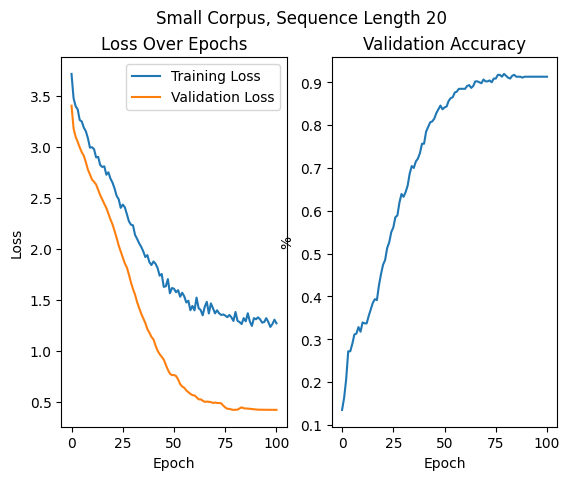

In [4]:
train_and_plot(20)


Begin init data loader


Batch Size: 0.00732421875 MiB
Data Loader init time: 0.128971 s
Begin init fetcher
Fetcher init time: 0.209704 s
Begin init data loader
Batch Size: 0.003662109375 MiB
Data Loader init time: 0.207975 s
Begin init fetcher
Fetcher init time: 0.293228 s
Training TransformerCharPredictor

----------------------------------------------------------------------------------------------------------------------------------------------------
Begin Training


/home/jaskin/Intro_Deep_Learning/env/lib/python3.11/site-packages/torchprofile/profile.py:22: UserWarning: No handlers found: "aten::unflatten". Skipped.
  warnings.warn('No handlers found: "{}". Skipped.'.format(
/home/jaskin/Intro_Deep_Learning/env/lib/python3.11/site-packages/torchprofile/profile.py:22: UserWarning: No handlers found: "aten::unsqueeze". Skipped.
  warnings.warn('No handlers found: "{}". Skipped.'.format(
/home/jaskin/Intro_Deep_Learning/env/lib/python3.11/site-packages/torchprofile/profile.py:22: UserWarning: No handlers found: "aten::scaled_dot_product_attention". Skipped.
  warnings.warn('No handlers found: "{}". Skipped.'.format(
/home/jaskin/Intro_Deep_Learning/env/lib/python3.11/site-packages/torchprofile/profile.py:22: UserWarning: No handlers found: "aten::permute". Skipped.
  warnings.warn('No handlers found: "{}". Skipped.'.format(


|       Epoch        |   Epoch Time (s)   |   Training Loss    |  Validation Loss   |Validation Accuracy |   Δ Accuracy (%)   |    Memory Usage    |
----------------------------------------------------------------------------------------------------------------------------------------------------
|         0          |      0.417862      |      3.721759      |      3.461727      |     15.208334      |         inf        |      2.798563      |
----------------------------------------------------------------------------------------------------------------------------------------------------
|         1          |      0.361615      |      3.512800      |      3.263120      |     14.583333      |     -4.109595      |      2.798563      |
----------------------------------------------------------------------------------------------------------------------------------------------------
|         2          |      0.337935      |      3.425609      |      3.159863      |     16.458334      |

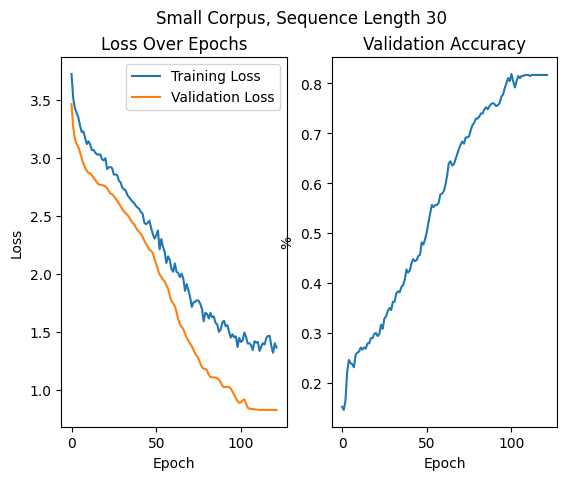

In [5]:
train_and_plot(30)
